# <font color = 'orange'> Advance House Price Prediction - EDA

---

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [3]:
dataset = pd.read_csv('Advance_House_Price_Prediction_train.csv')

dataset.shape

(1460, 81)

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

In [5]:
# lets see feature which contains nan values

features_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 1]

print('Feature with percentage of missing values.\n')
for feature in features_with_nan:
    print(f"{feature} = {np.round(dataset[feature].isnull().mean() * 100, 2)}%")

Feature with percentage of missing values.

LotFrontage = 17.74%
Alley = 93.77%
MasVnrType = 0.55%
MasVnrArea = 0.55%
BsmtQual = 2.53%
BsmtCond = 2.53%
BsmtExposure = 2.6%
BsmtFinType1 = 2.53%
BsmtFinType2 = 2.6%
FireplaceQu = 47.26%
GarageType = 5.55%
GarageYrBlt = 5.55%
GarageFinish = 5.55%
GarageQual = 5.55%
GarageCond = 5.55%
PoolQC = 99.52%
Fence = 80.75%
MiscFeature = 96.3%


In [6]:
print(dataset.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

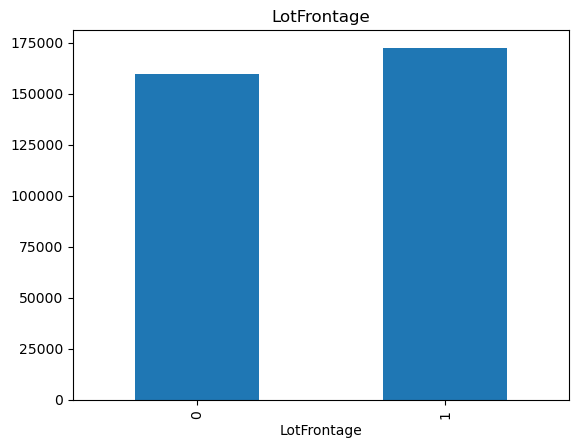

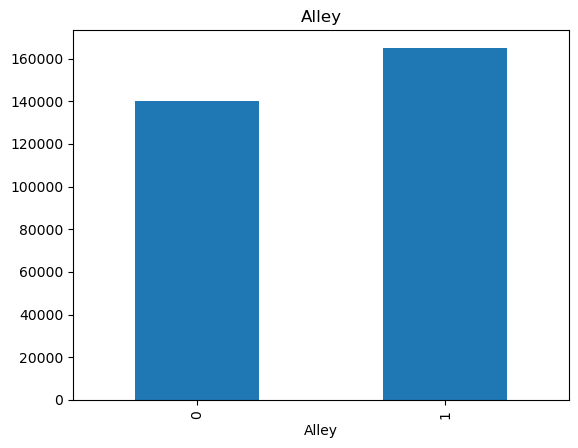

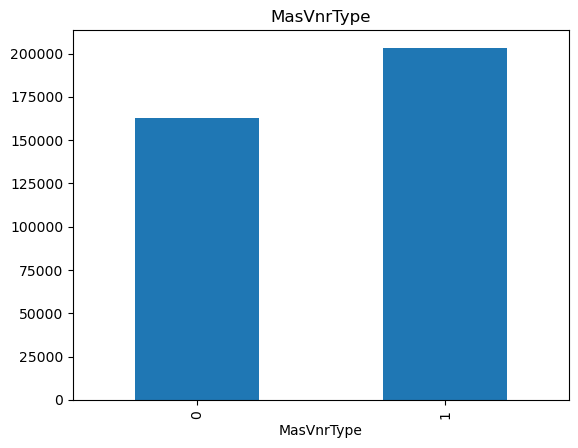

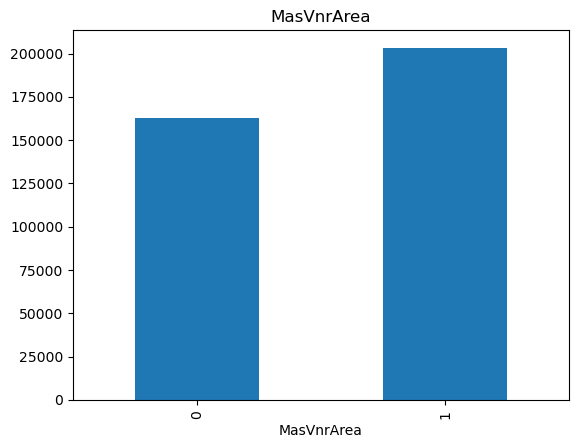

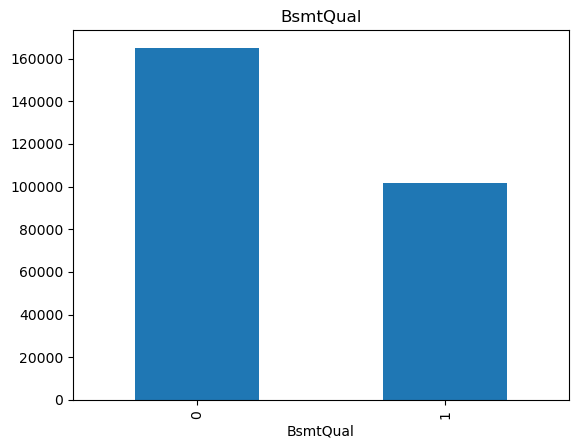

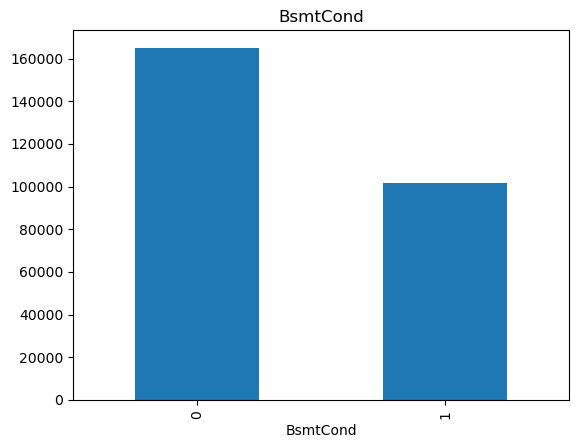

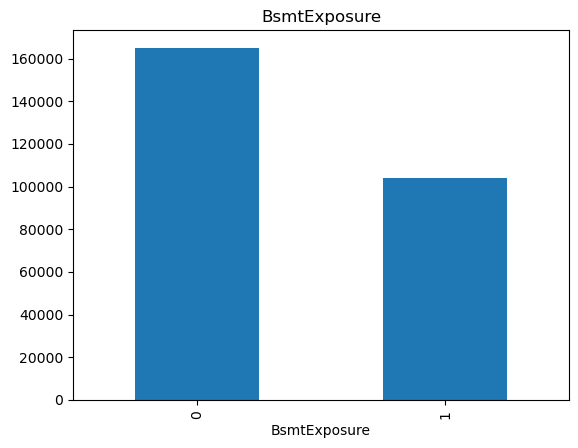

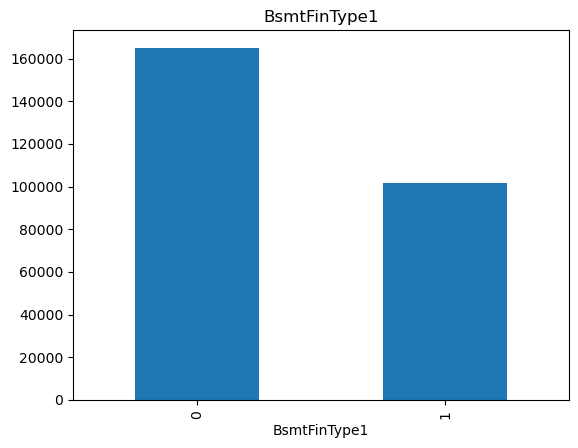

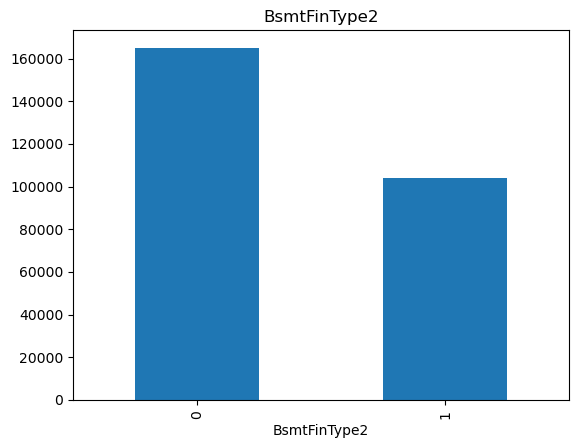

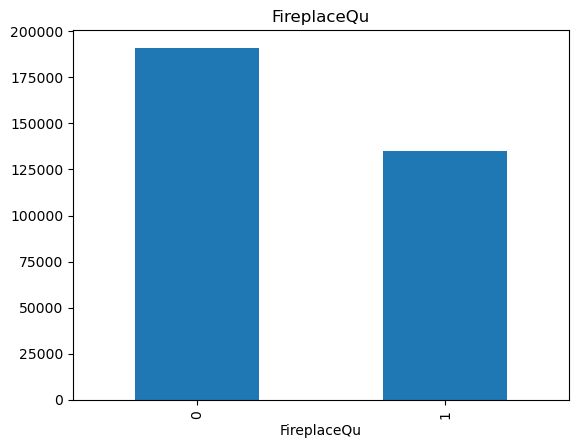

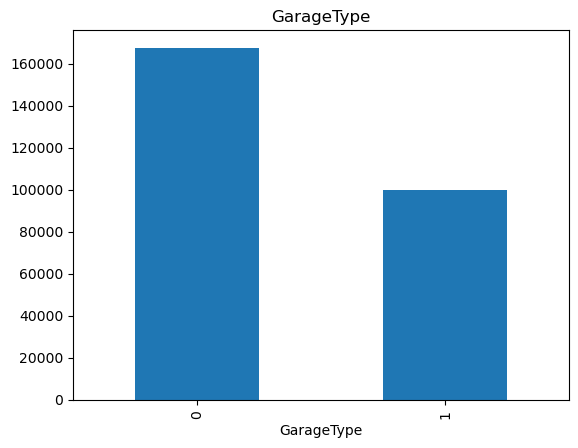

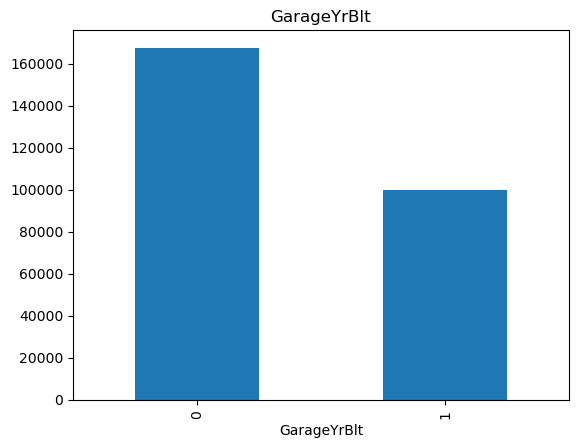

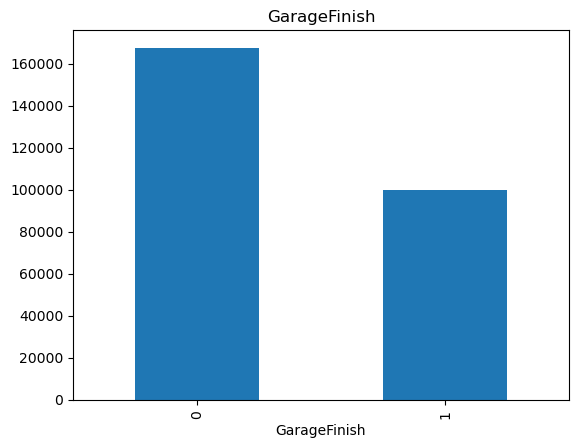

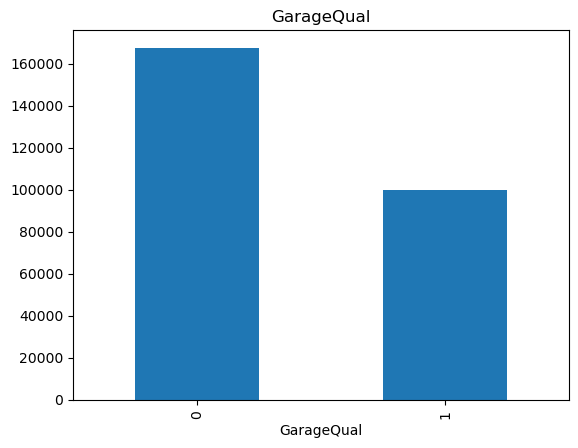

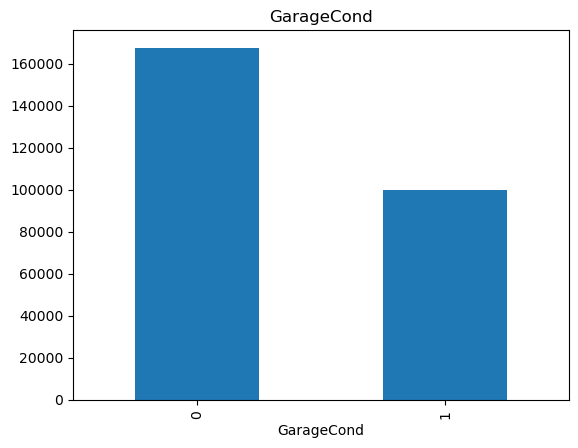

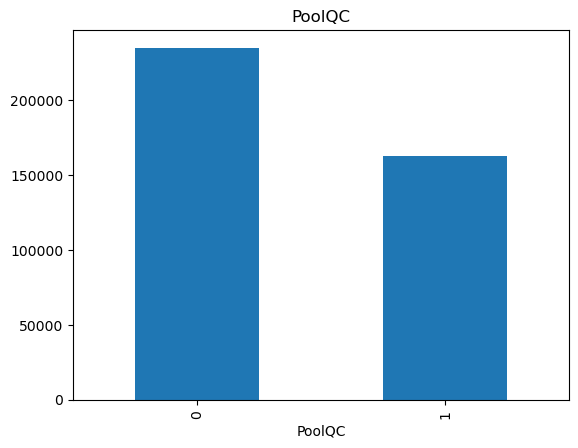

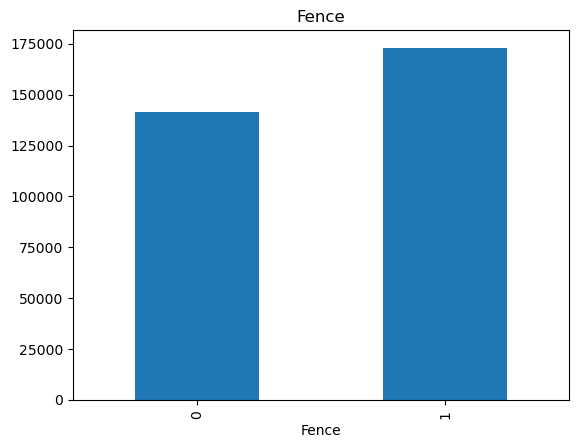

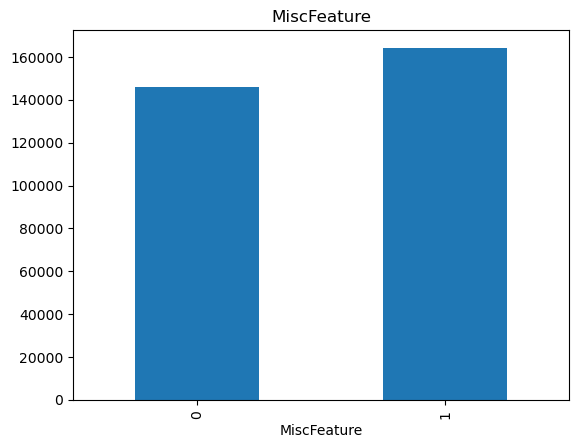

In [8]:
# As there are many missing values we will find the realtionship between the missing values and the sales price

for feature in features_with_nan:
    data = dataset.copy()
    # if value is missing then it is 1 
    # if value is not missing then it is 0
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

In [10]:
print(f'Id of the house is {len(dataset.Id)}')

Id of the house is 1460


In [19]:
# numerical variables

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']

print(len(numerical_features))

dataset[numerical_features].head()

38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### As we can see that we have 4 year variables

In [20]:
# year feature contains substring 'Yr' or 'Year'
year_feature = [feature for feature in dataset.columns if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [23]:
# let's see the unique values of the numerical features

for feature in year_feature:
    print(feature, dataset[feature].unique(),'\n')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

Text(0.5, 1.0, 'House Price v/s Year Sold')

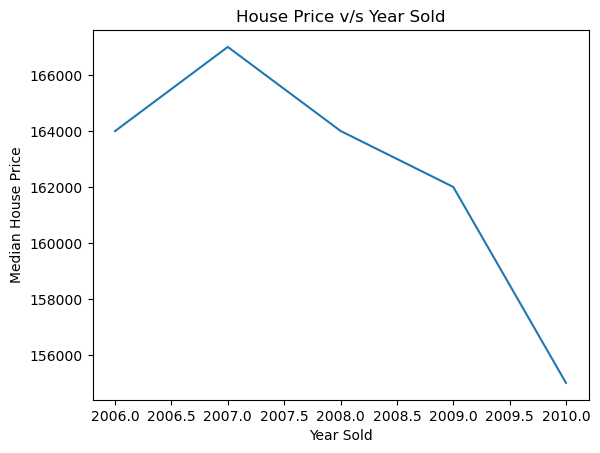

In [24]:
# let's analyze the temporal datatime variable
# and check the relationship between the year house is sold and sale price

dataset.groupby('YrSold')['SalePrice'].median().plot()

plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price v/s Year Sold')

#### Here, price is decreasing as the year increases

In [25]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

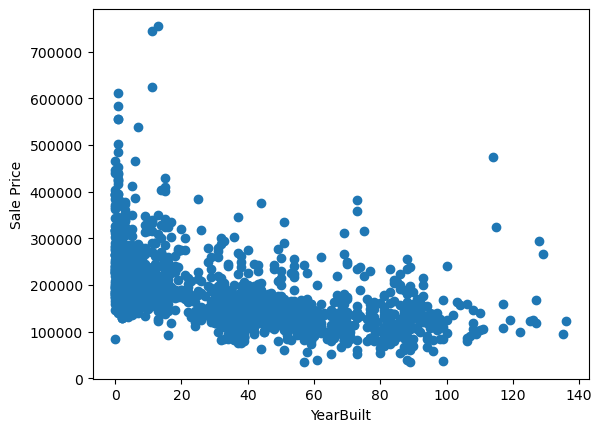

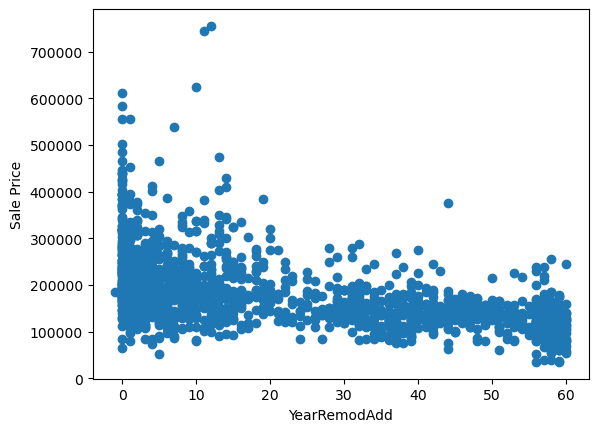

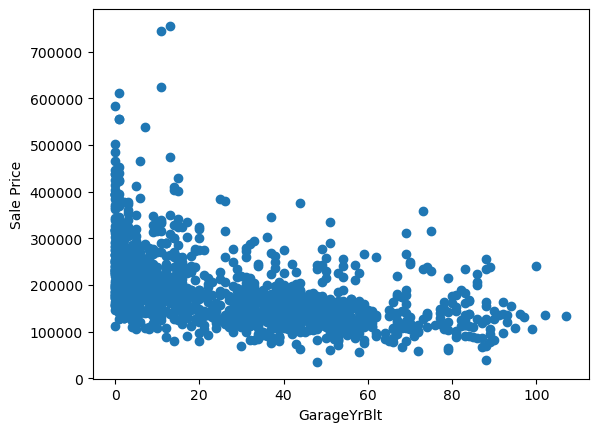

In [27]:
# let's compare the difference between all years feature with sale price

for feature in year_feature:
    if feature != 'YrSold':
        data = dataset.copy()
        data[feature] = data['YrSold'] - data[feature]

        plt.scatter(data[feature], data['SalePrice'])

        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

### Numerical Features
#### There are 2 types of numerical variable 
1. Continous variable.
2. Discrete varialbe.

#### Discrete Features

In [28]:
discrete_feature = [feature for feature in numerical_features if (len(dataset[feature].unique()) < 25) and (feature not in year_feature + ['Id']) ]

discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

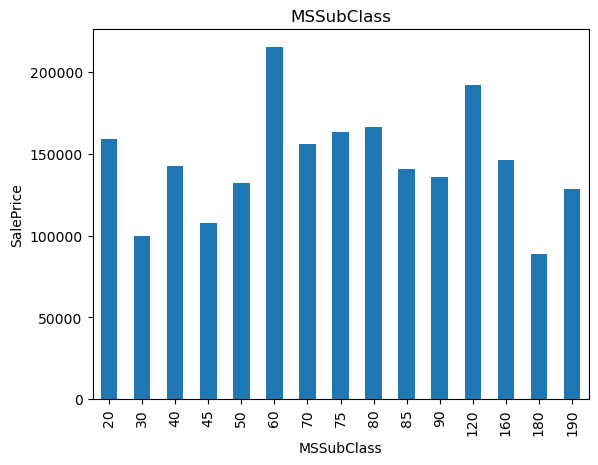

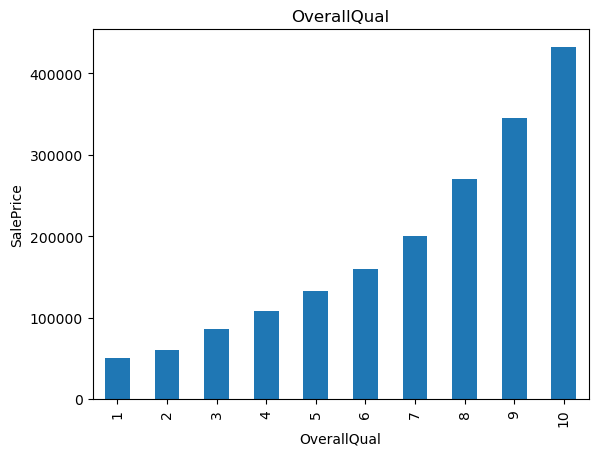

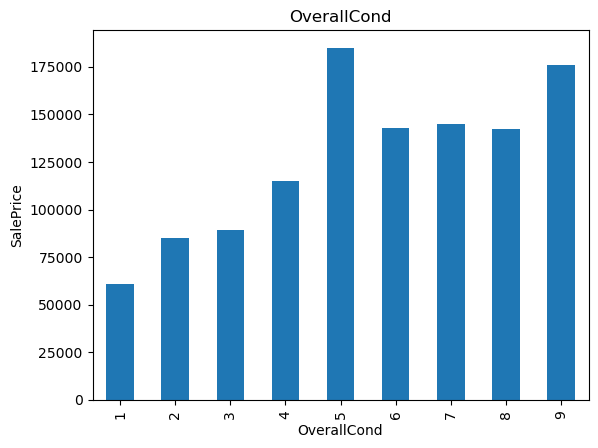

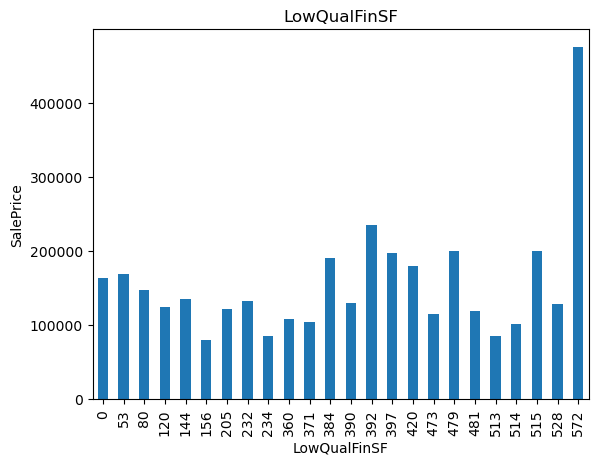

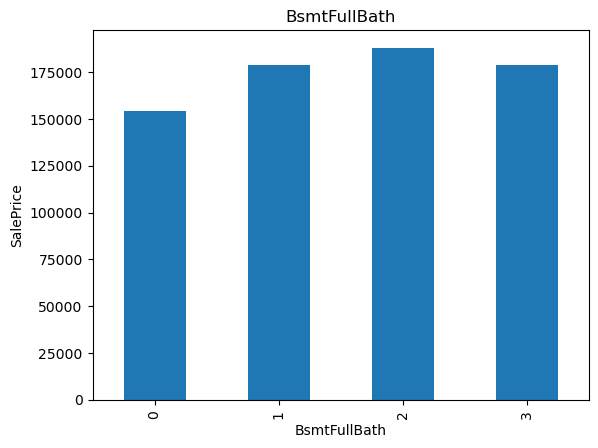

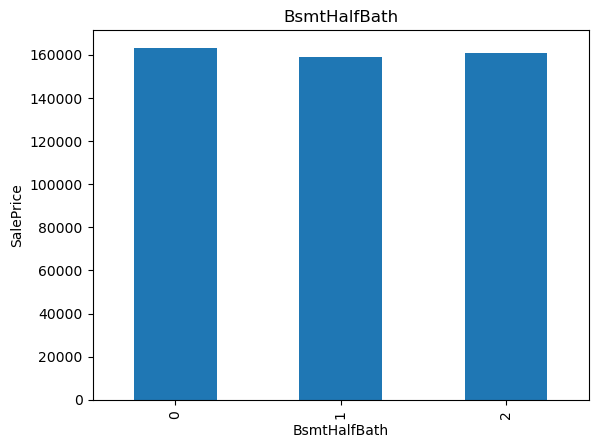

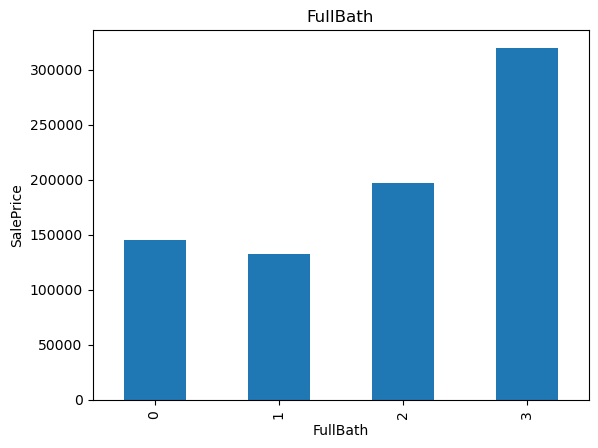

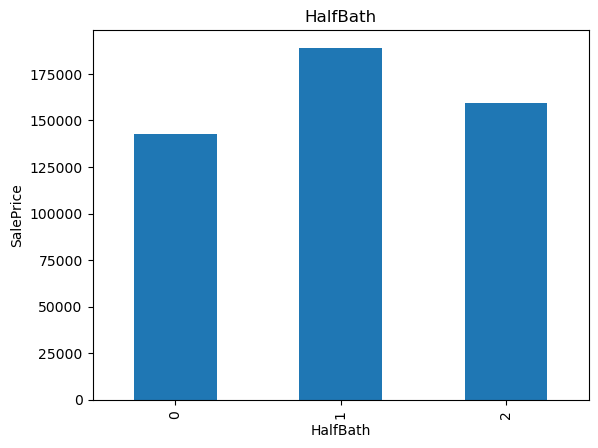

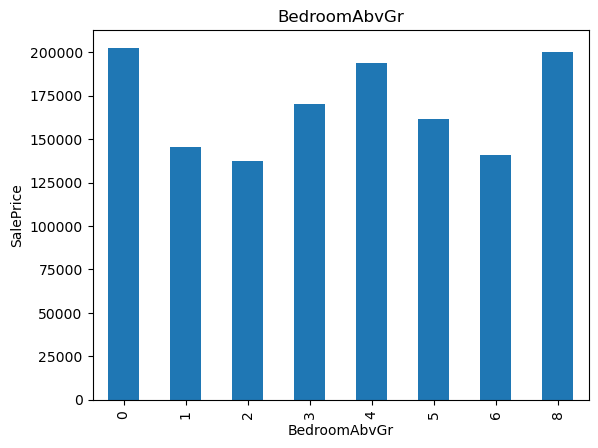

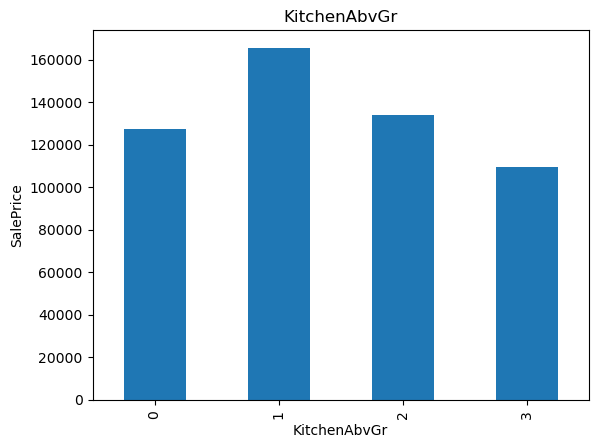

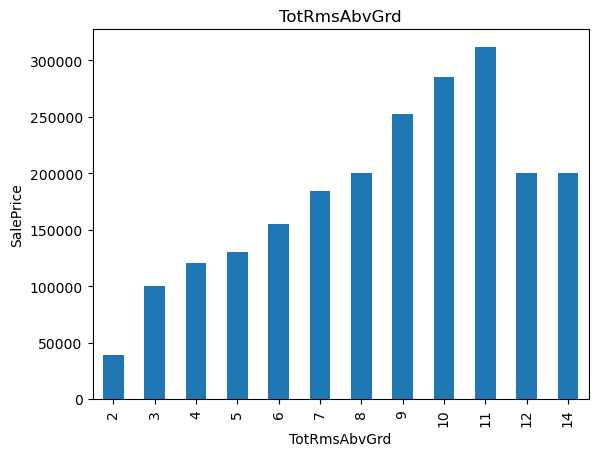

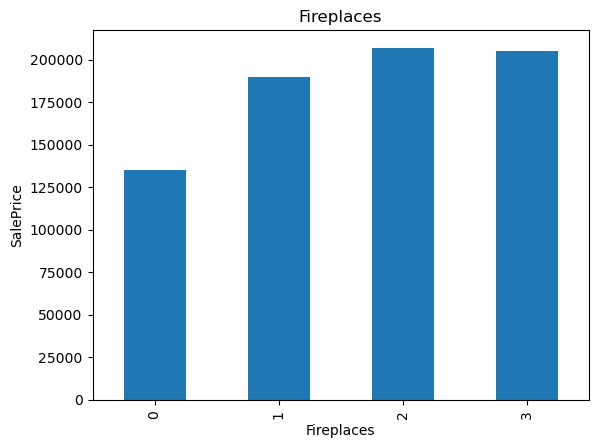

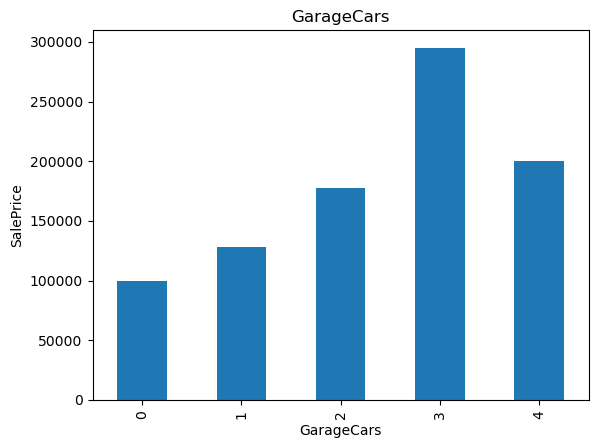

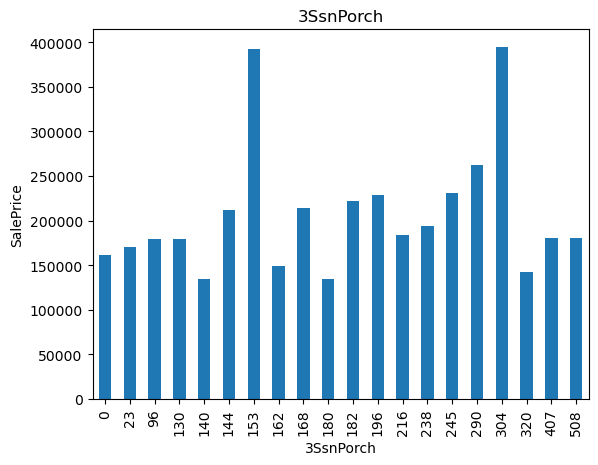

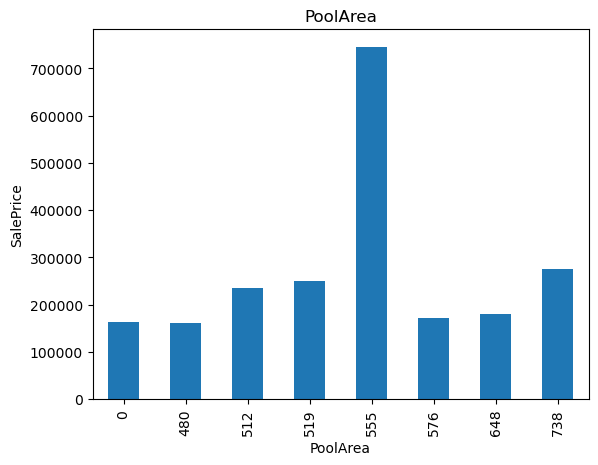

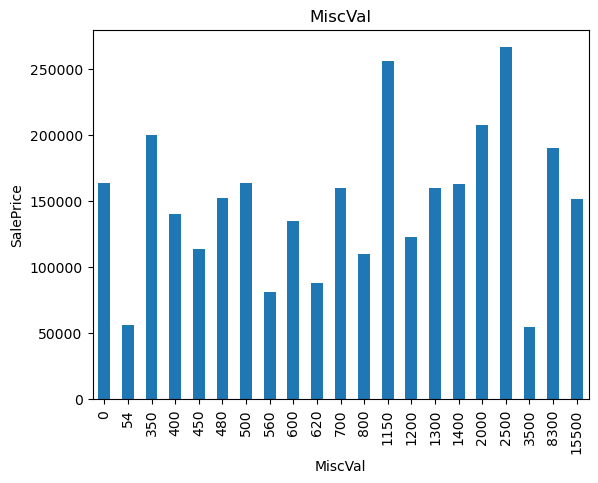

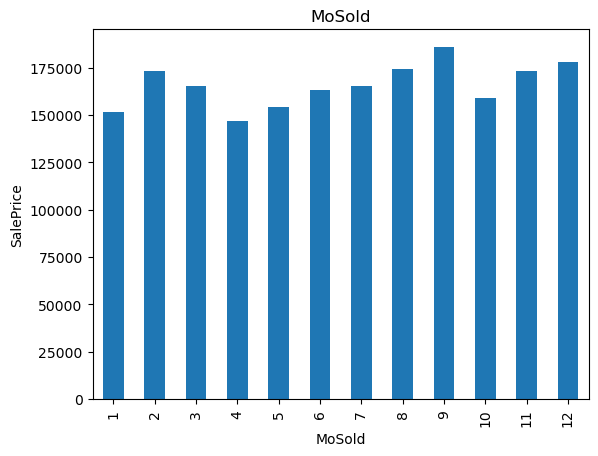

In [31]:
# let's see the relationship between discrete features and Sale Price

for feature in discrete_feature:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Continous Features

In [33]:
# let's see the contious feature
continous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_feature + ['Id'] ]

continous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

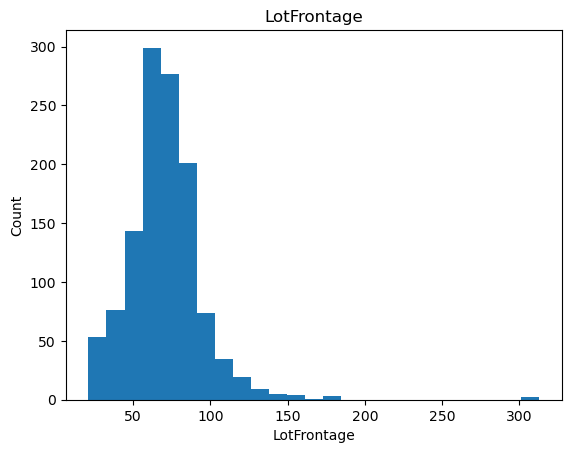

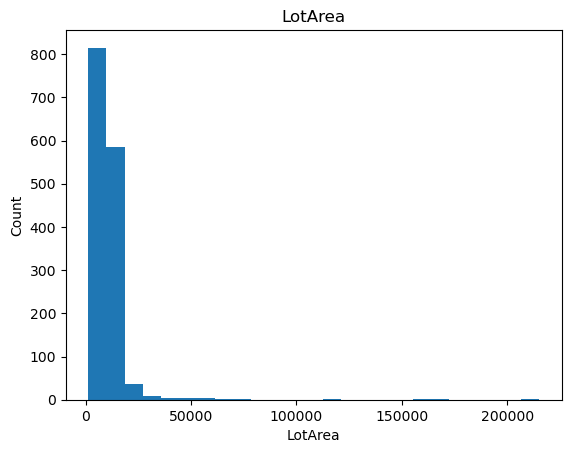

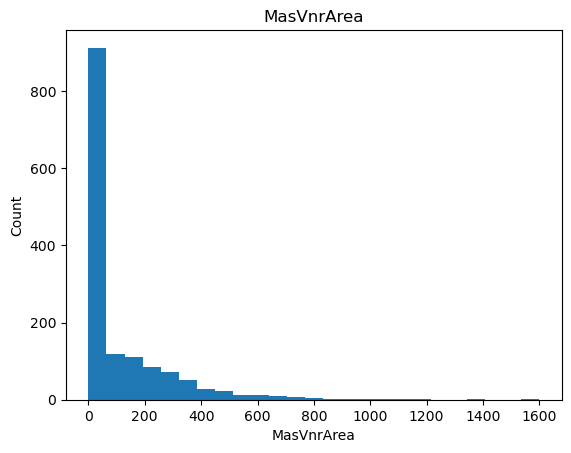

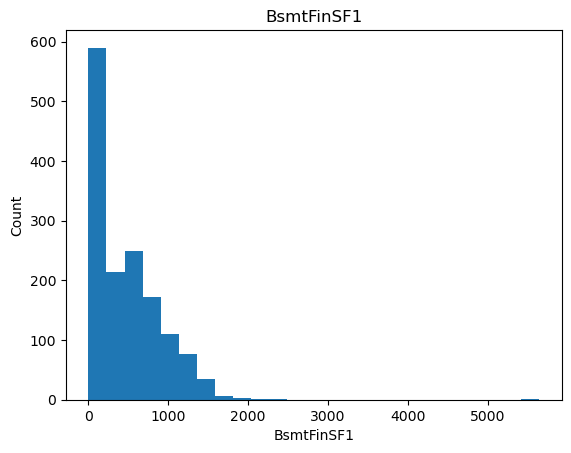

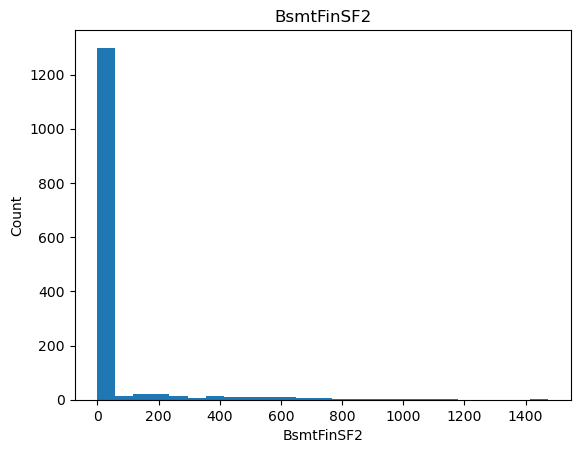

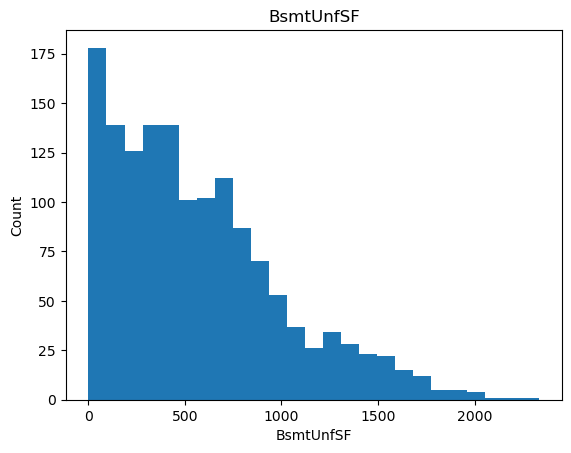

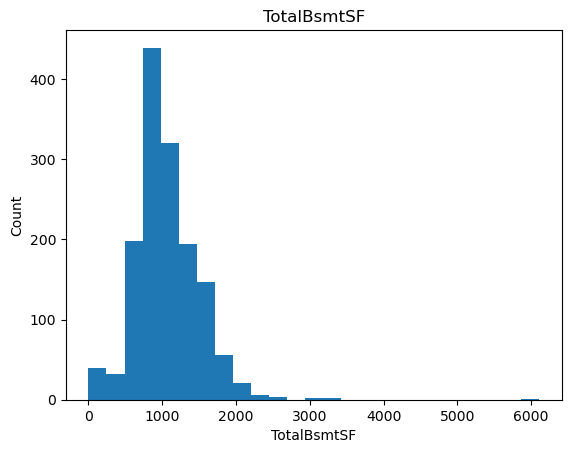

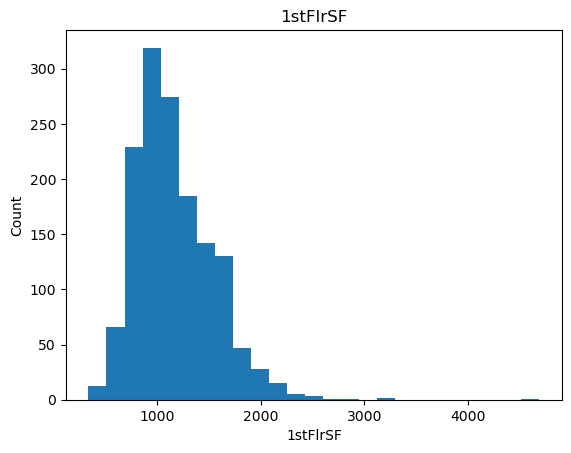

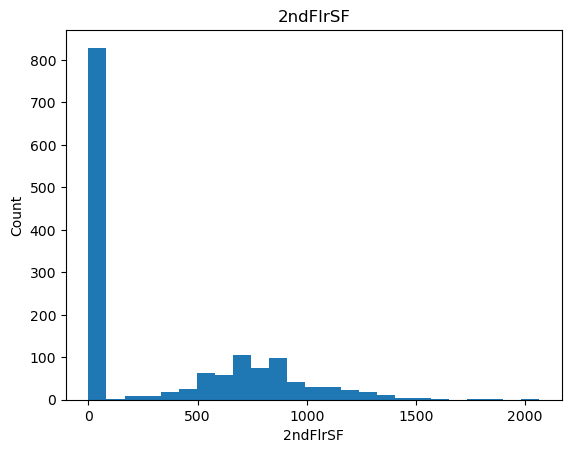

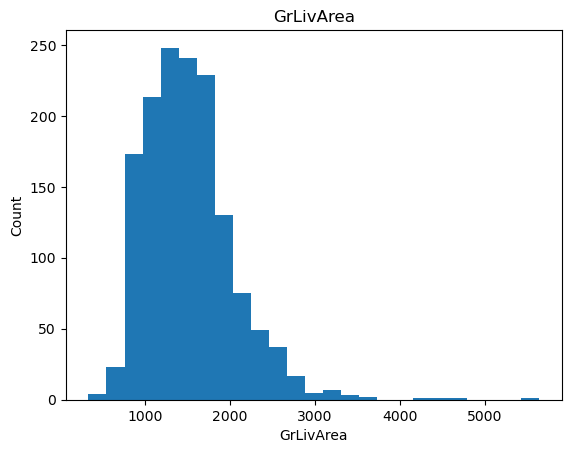

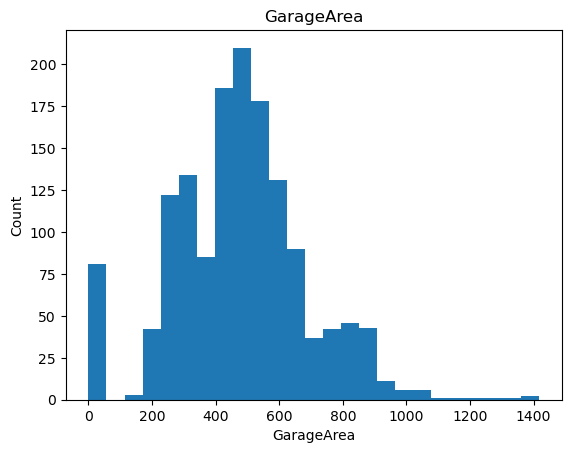

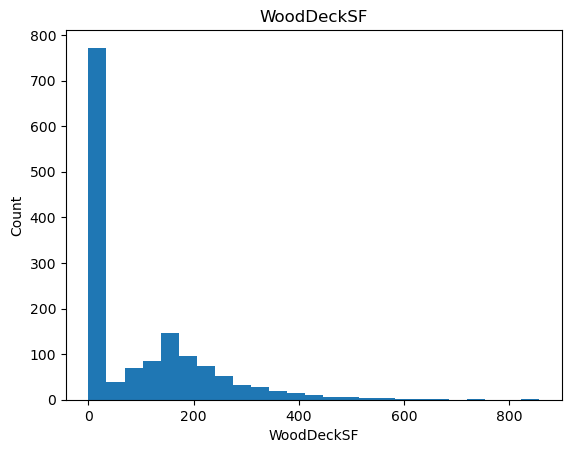

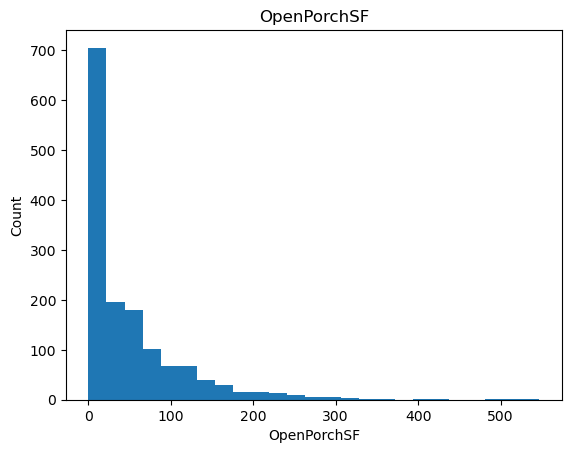

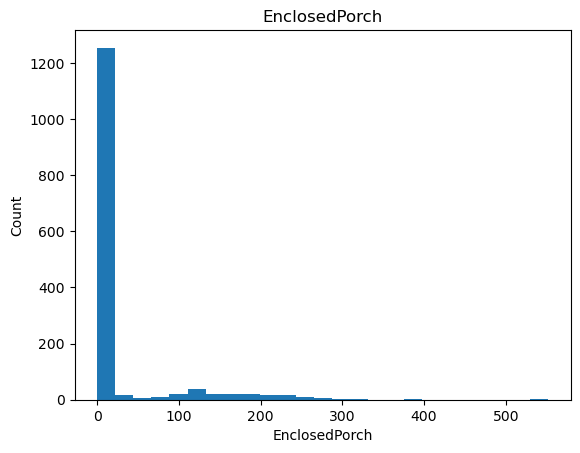

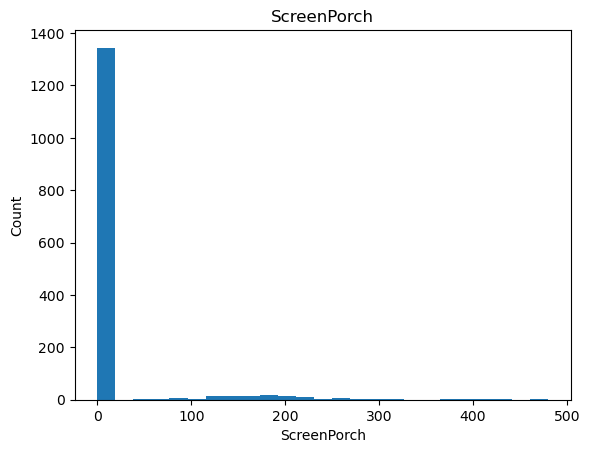

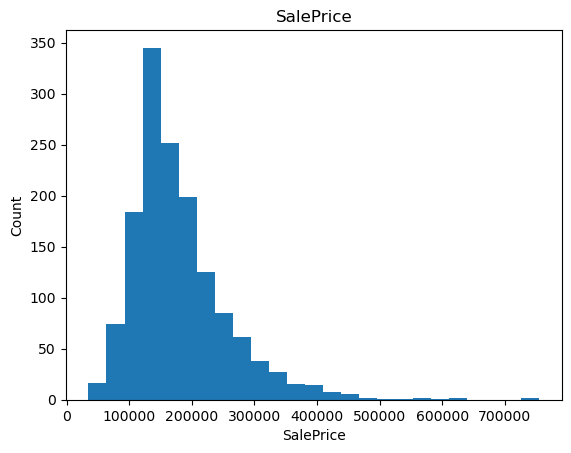

In [37]:
# lets see the realtionship between the continous feature and the Sale Price

for feature in continous_feature:
    data = dataset.copy()
    data[feature].hist(bins = 25)
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.grid(False)
    plt.show()

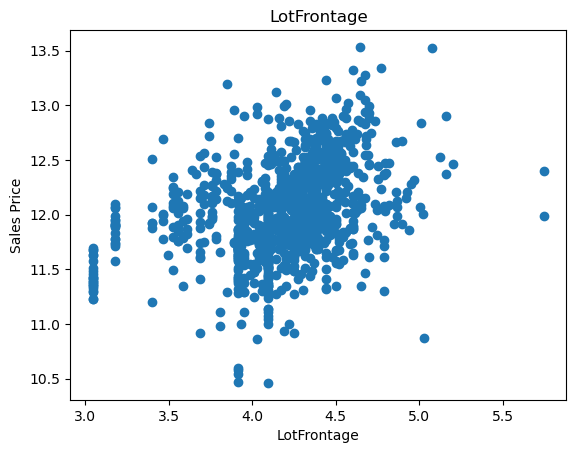

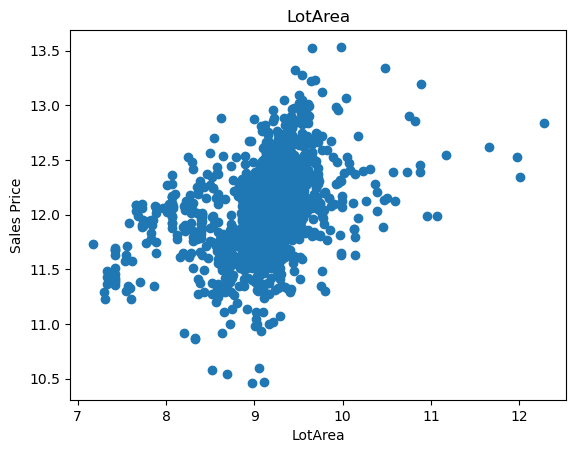

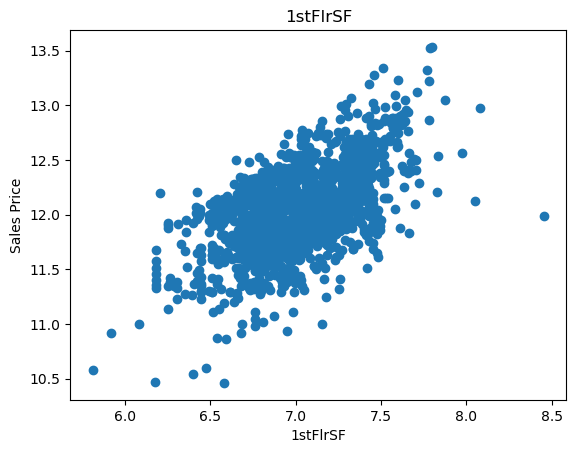

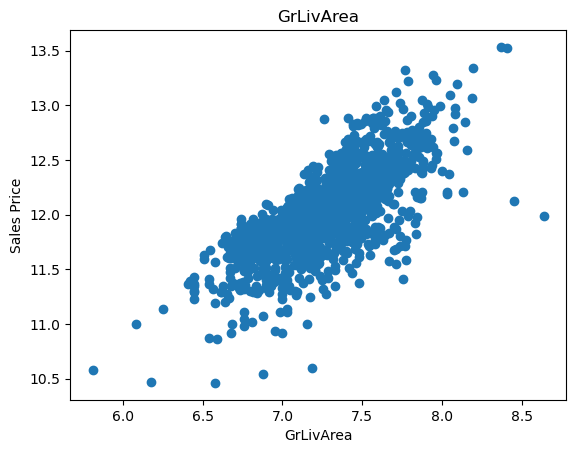

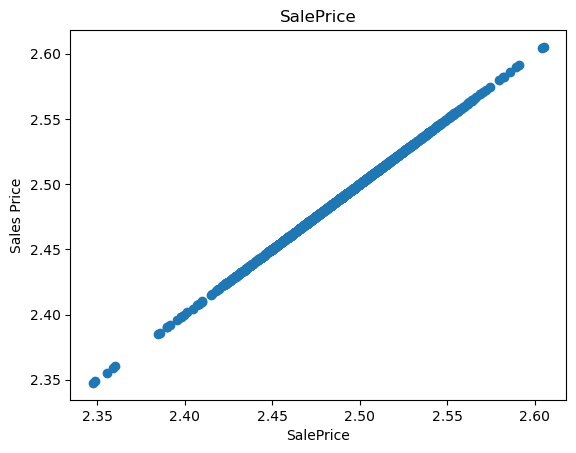

In [40]:
# we will do the logrithmic transformation

for feature in continous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass 
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.title(feature)
        plt.show()

### Outliers

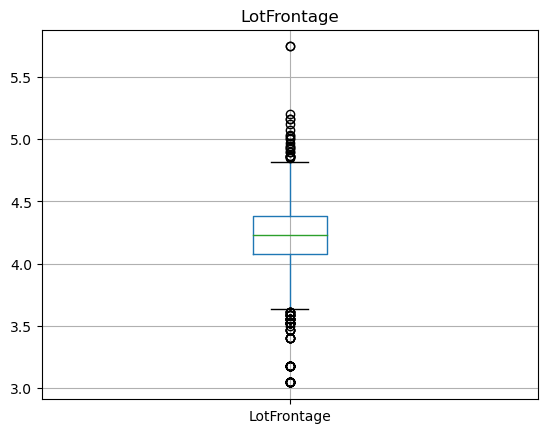

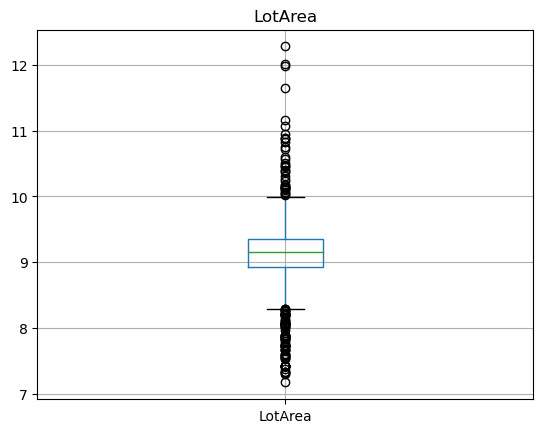

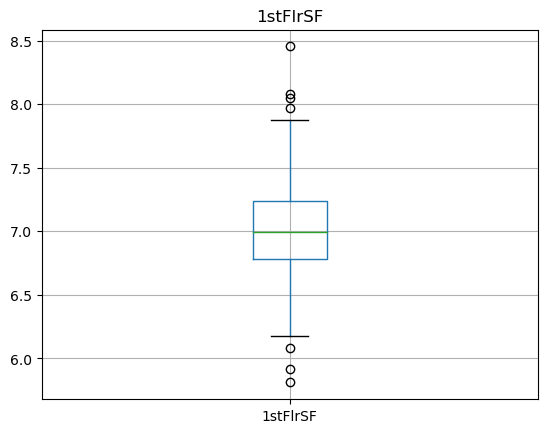

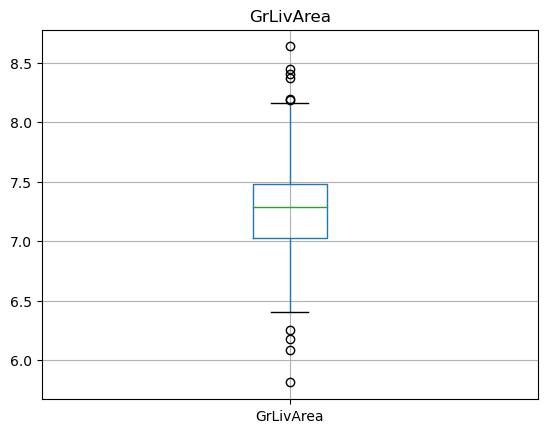

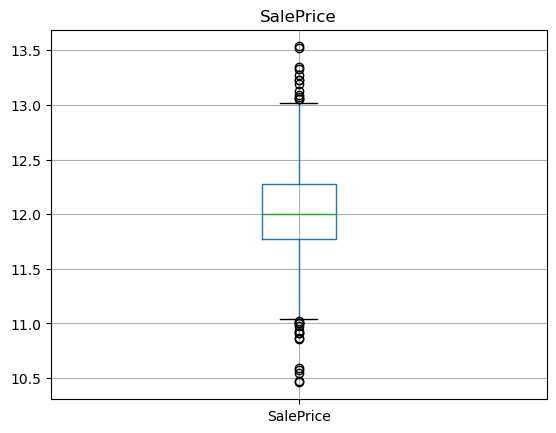

In [42]:
for feature in continous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.title(feature)
        plt.show()

### Categorical Variables

In [43]:
categorical_feature = [feature for feature in dataset.columns if data[feature].dtypes == 'O']

categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [44]:
dataset[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [48]:
for feature in categorical_feature:
    print(f'{feature} feature has {len(dataset[feature].unique())} unique features.\n')

MSZoning feature has 5 unique features.

Street feature has 2 unique features.

Alley feature has 3 unique features.

LotShape feature has 4 unique features.

LandContour feature has 4 unique features.

Utilities feature has 2 unique features.

LotConfig feature has 5 unique features.

LandSlope feature has 3 unique features.

Neighborhood feature has 25 unique features.

Condition1 feature has 9 unique features.

Condition2 feature has 8 unique features.

BldgType feature has 5 unique features.

HouseStyle feature has 8 unique features.

RoofStyle feature has 6 unique features.

RoofMatl feature has 8 unique features.

Exterior1st feature has 15 unique features.

Exterior2nd feature has 16 unique features.

MasVnrType feature has 5 unique features.

ExterQual feature has 4 unique features.

ExterCond feature has 5 unique features.

Foundation feature has 6 unique features.

BsmtQual feature has 5 unique features.

BsmtCond feature has 5 unique features.

BsmtExposure feature has 5 uni

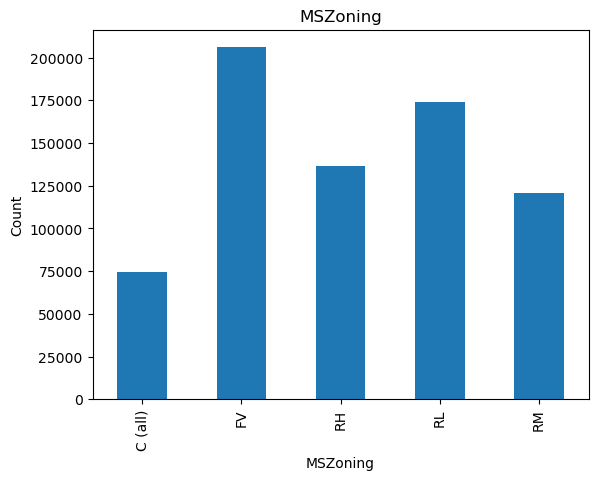

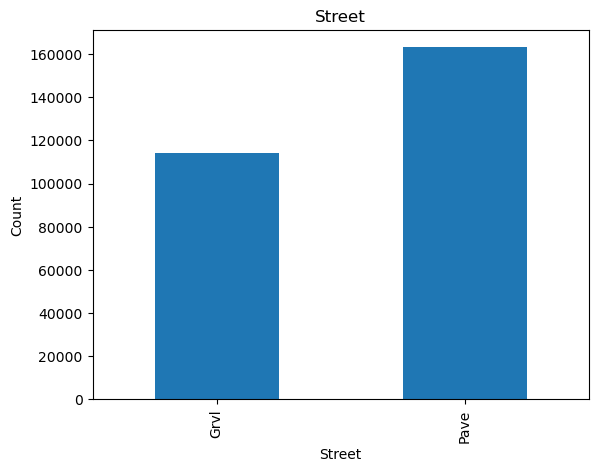

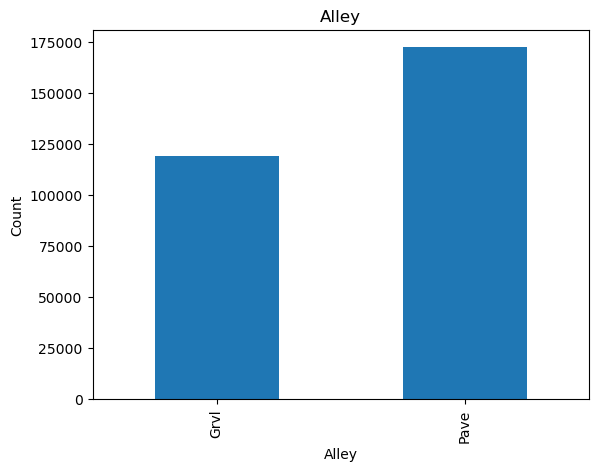

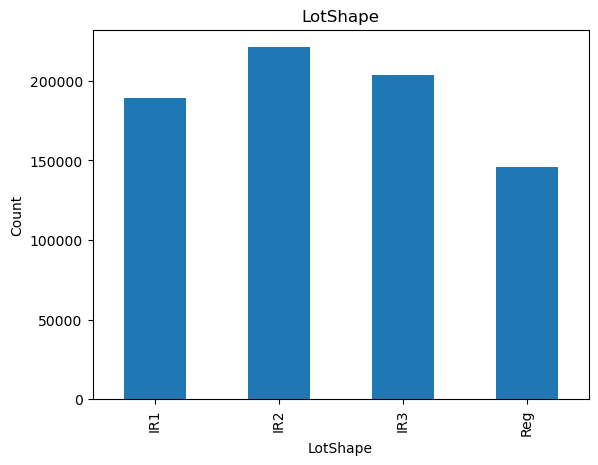

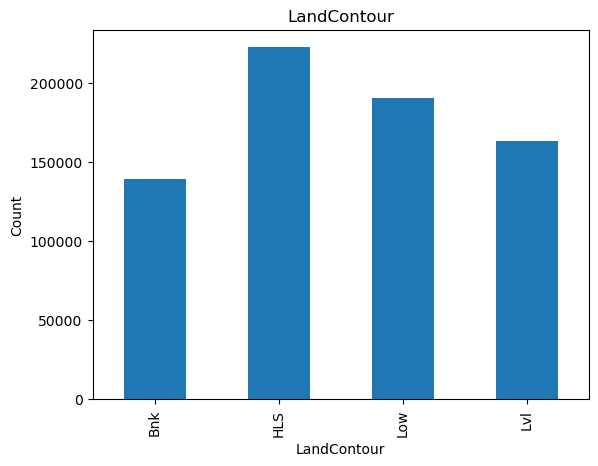

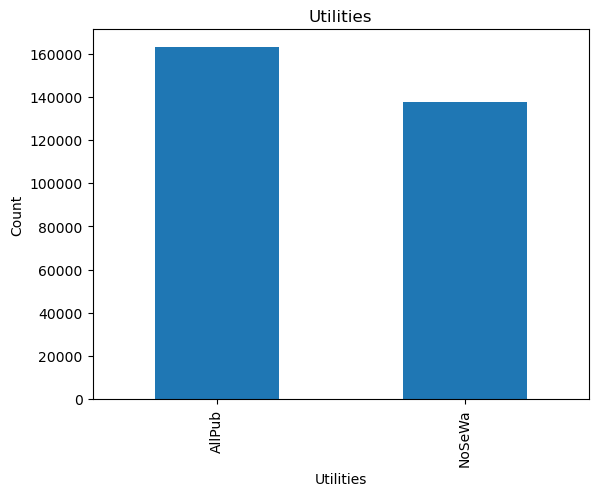

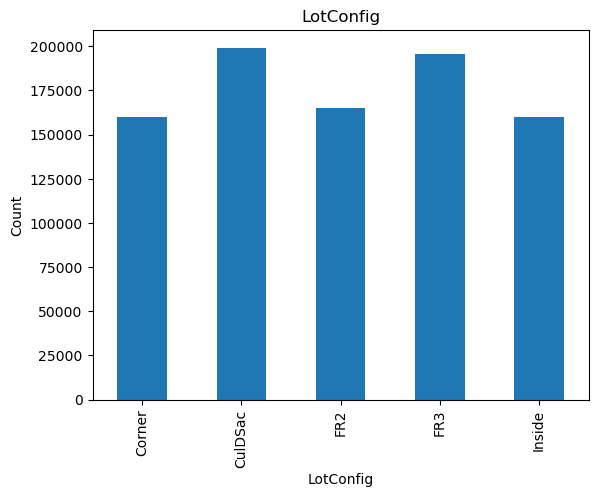

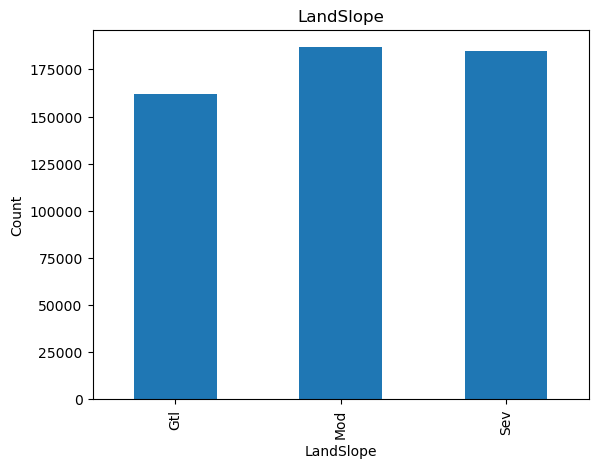

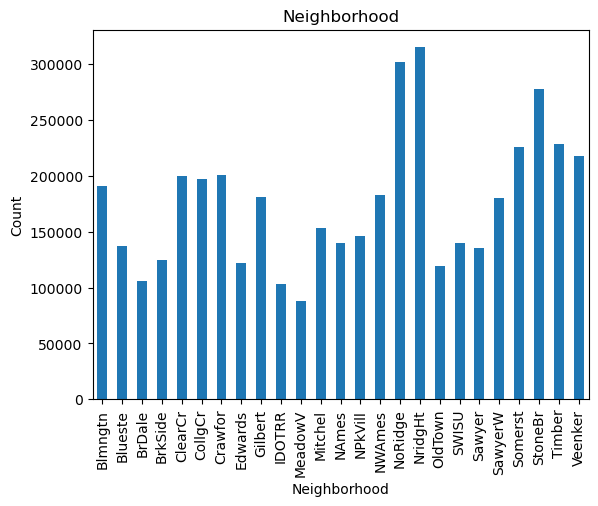

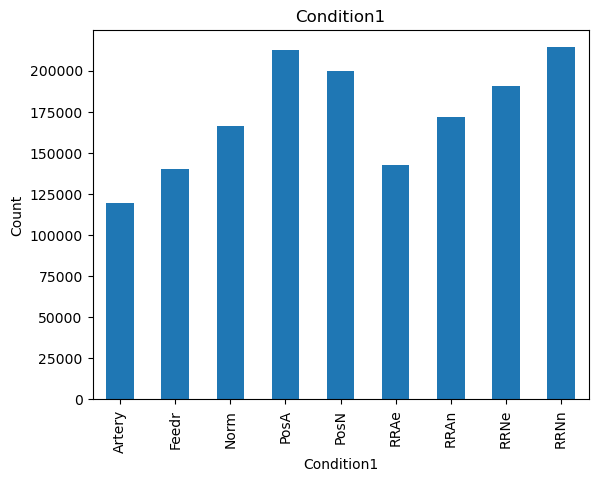

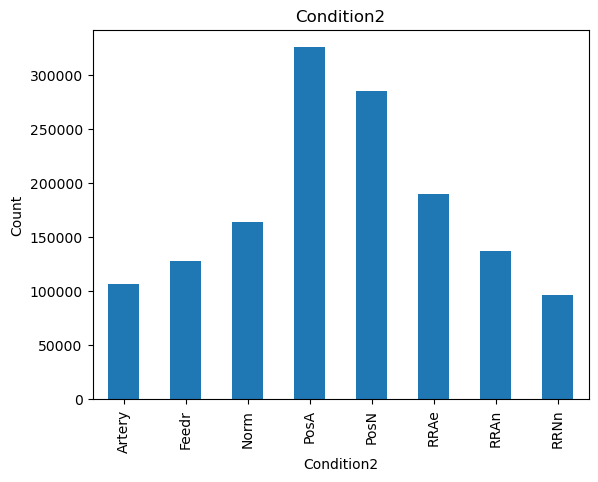

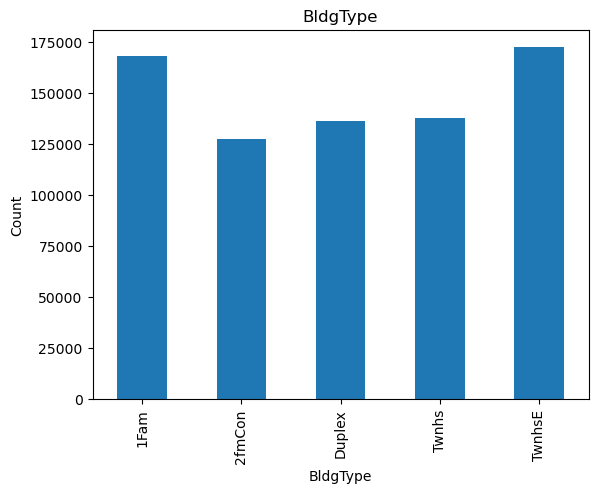

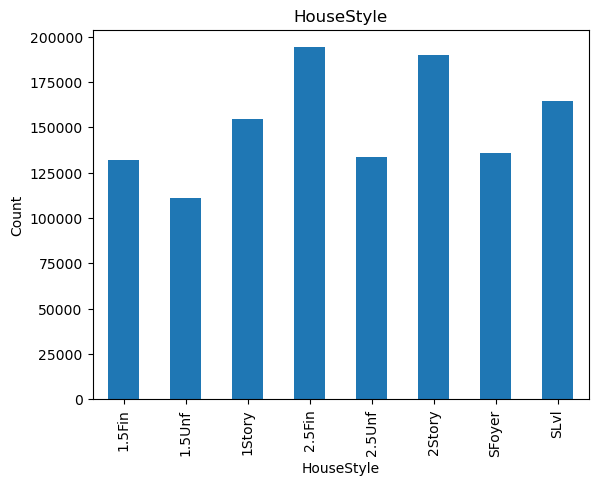

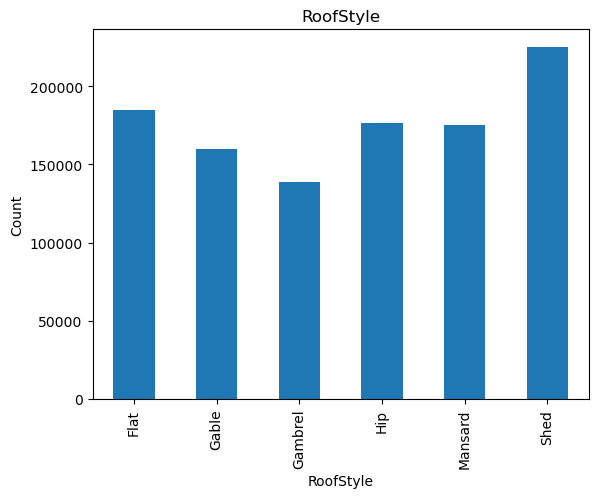

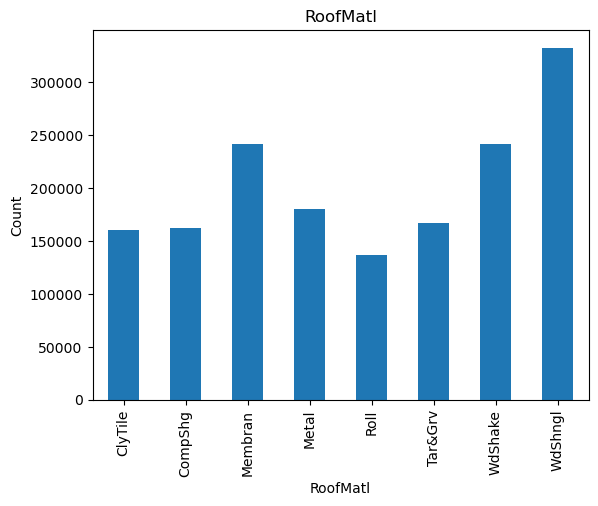

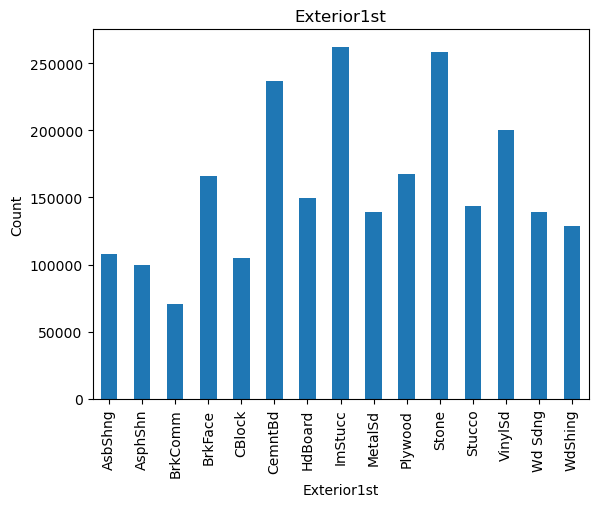

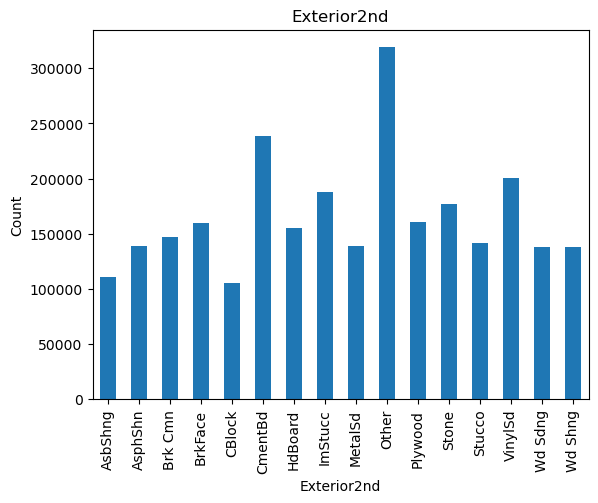

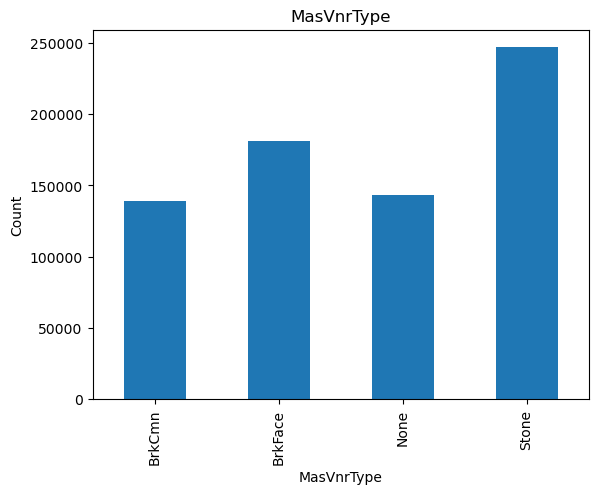

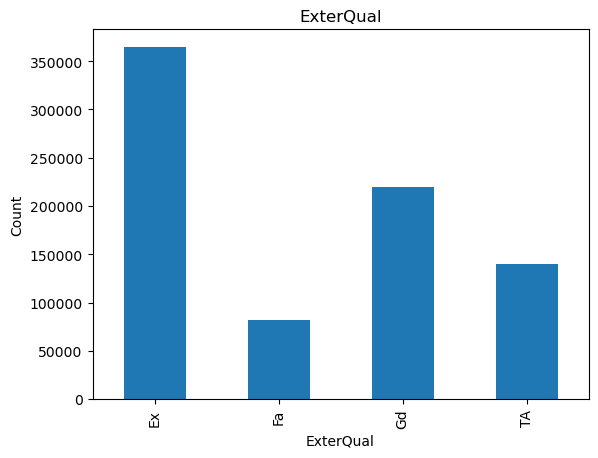

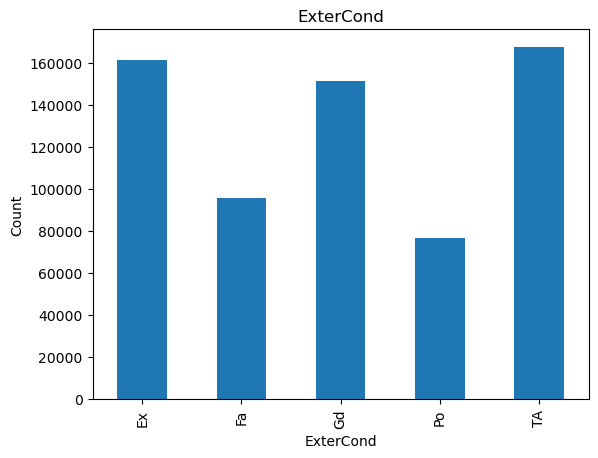

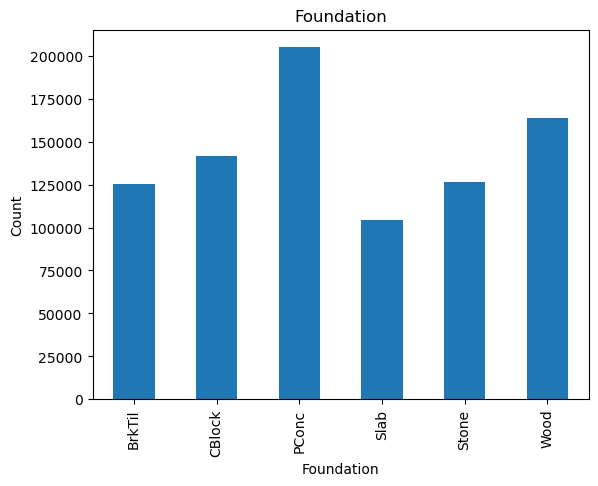

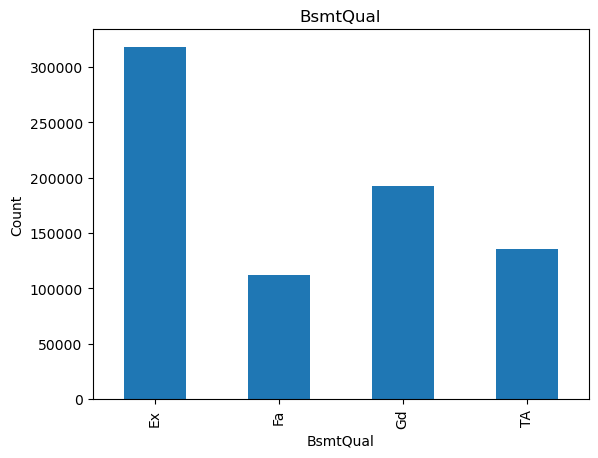

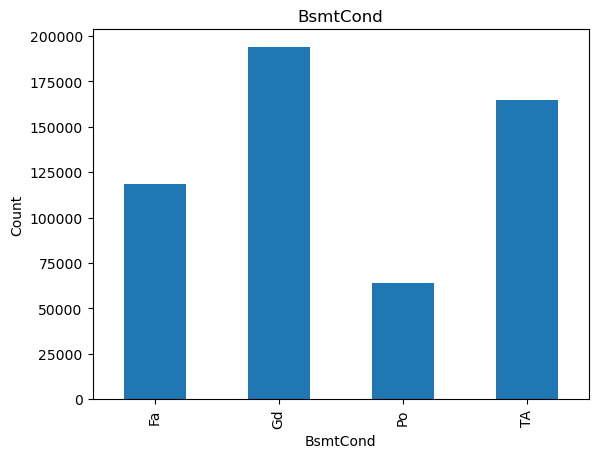

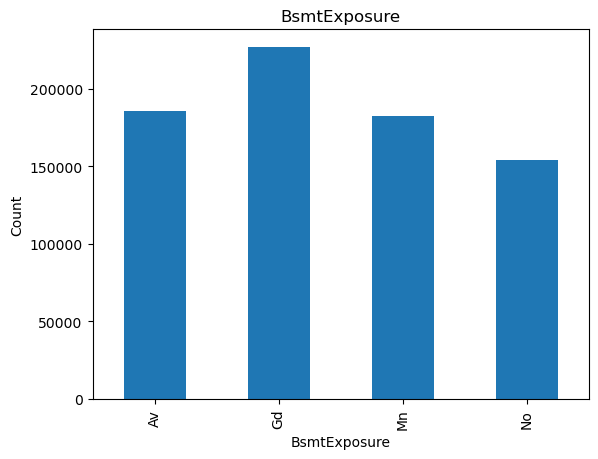

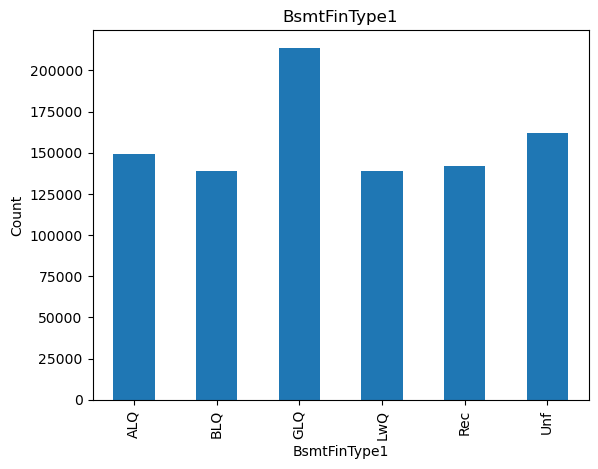

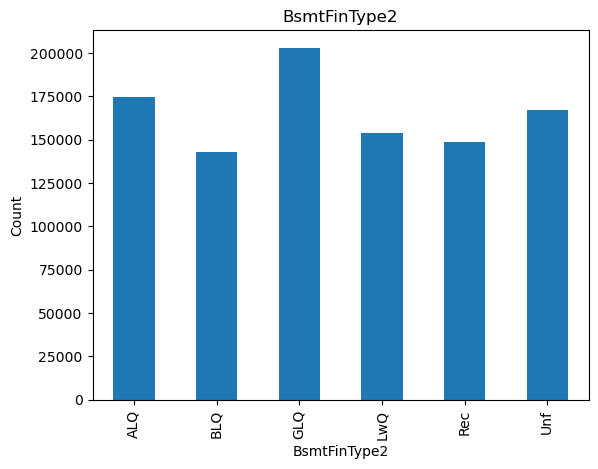

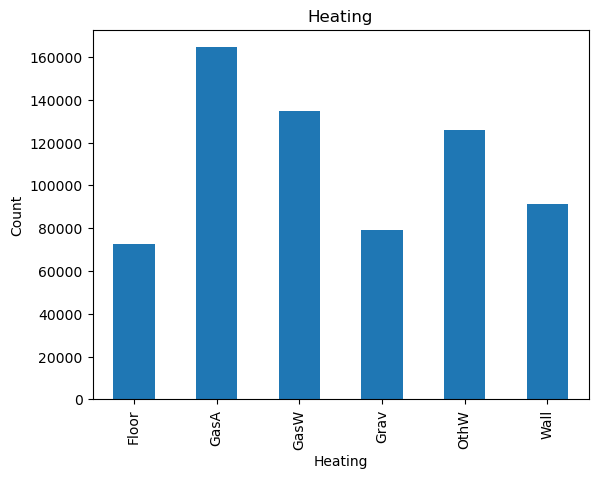

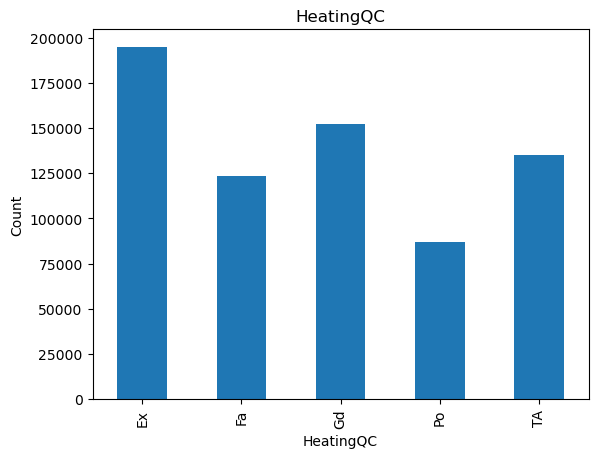

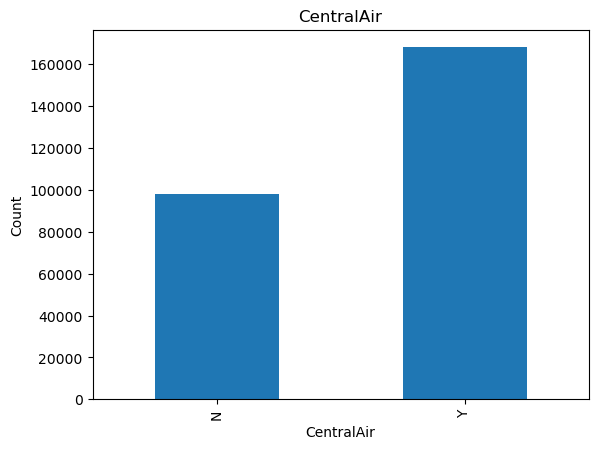

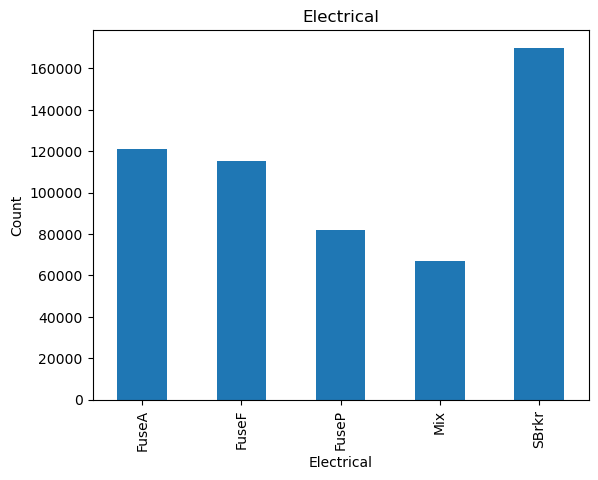

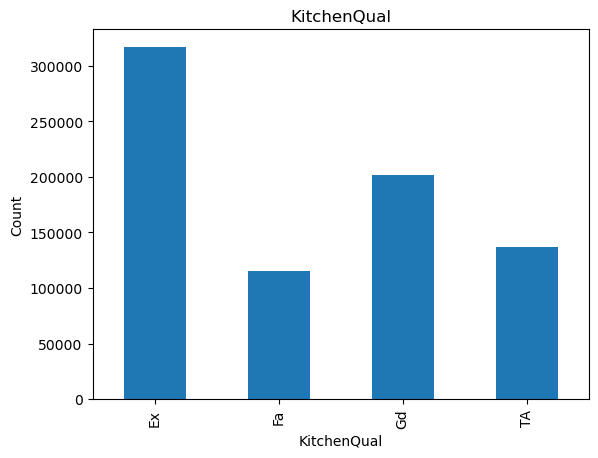

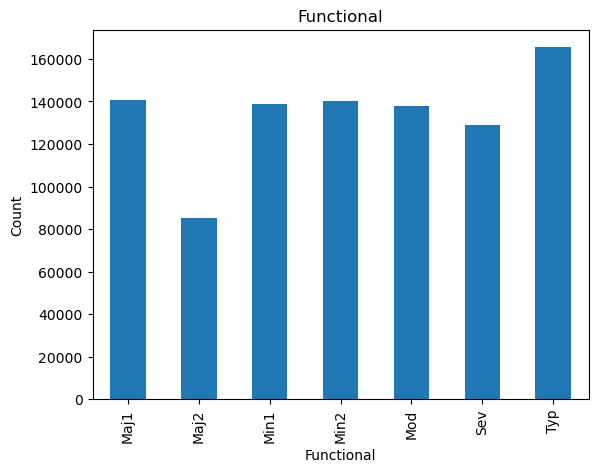

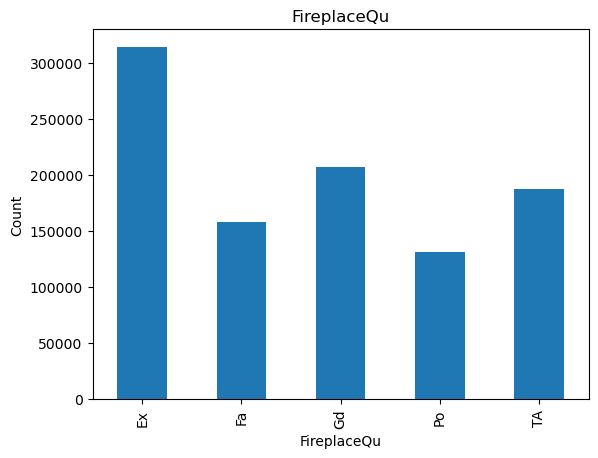

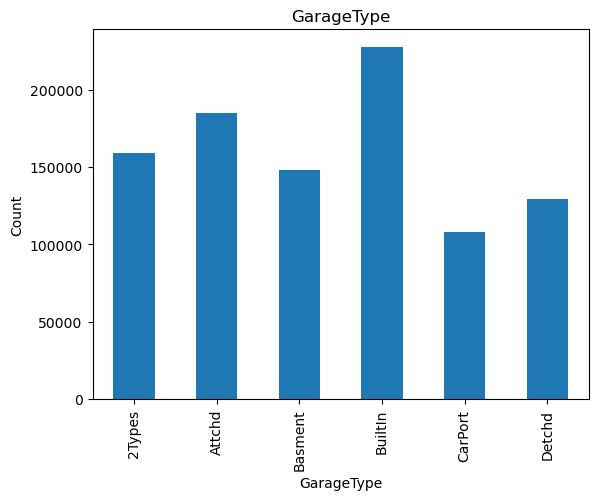

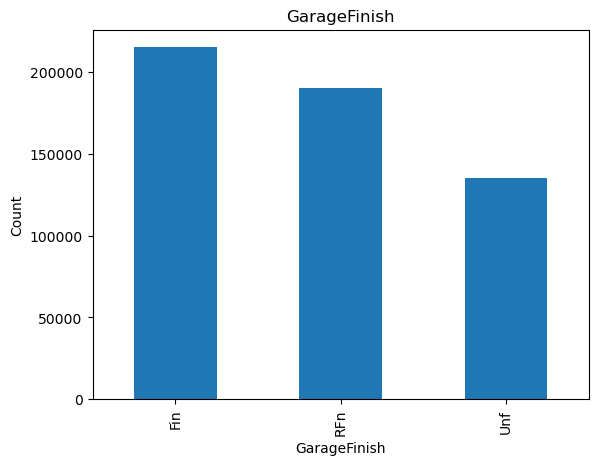

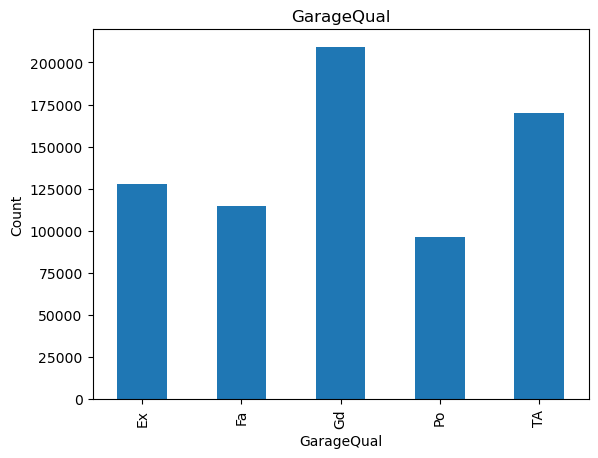

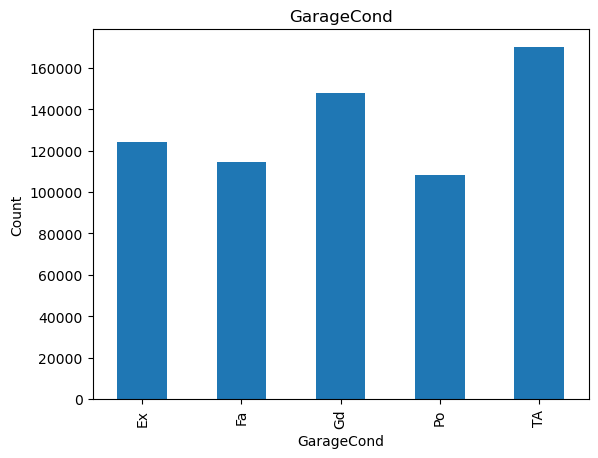

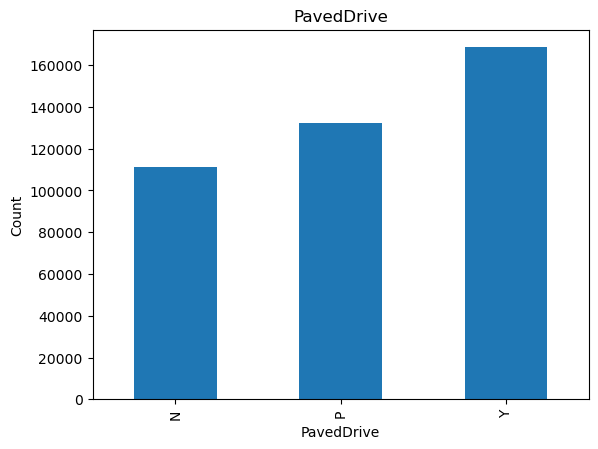

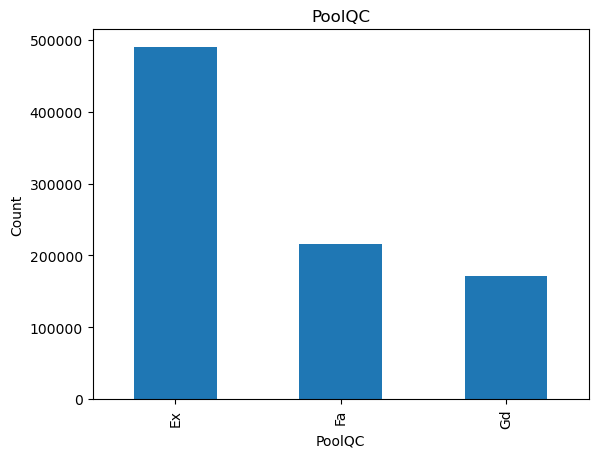

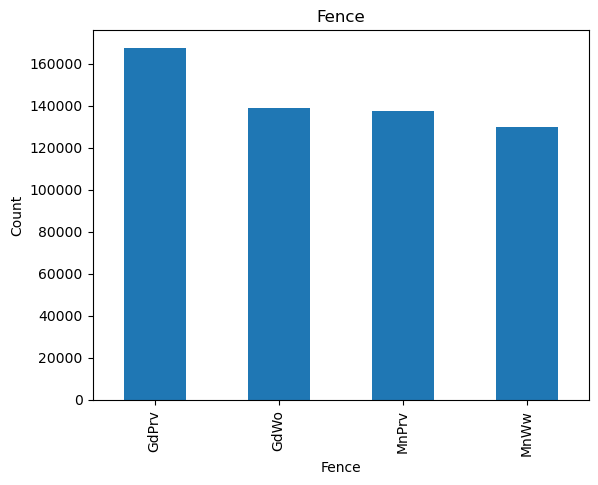

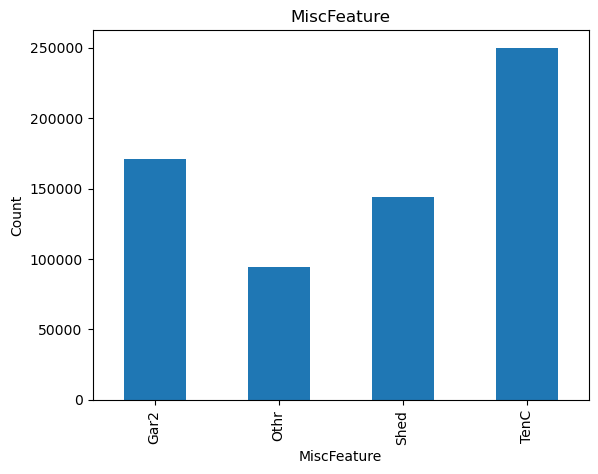

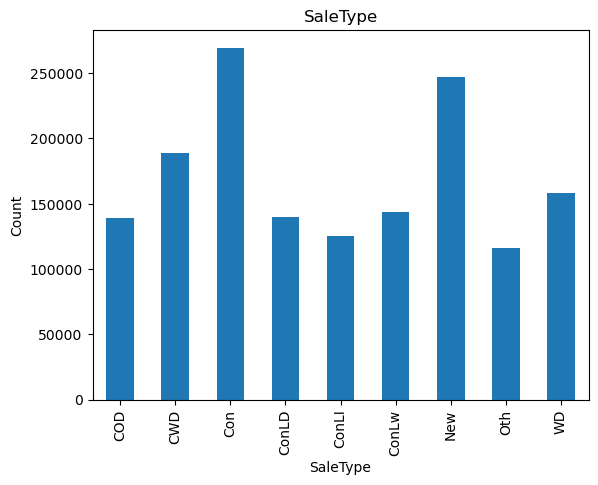

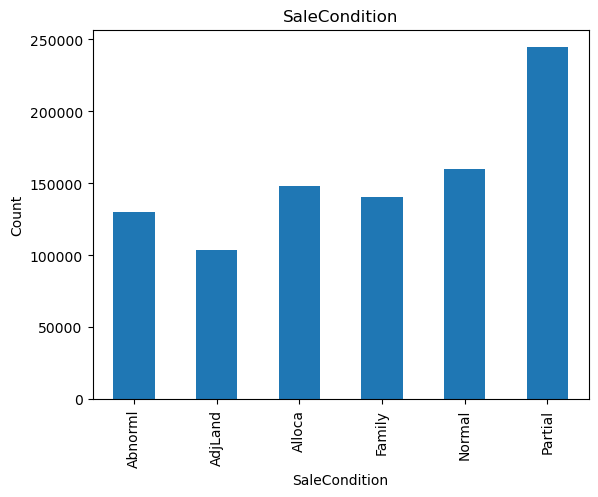

In [49]:
# let's find the relationship between the categorical feature and the Sale Price

for feature in categorical_feature:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

---

1. Separated Nan Features and checked how many are there using bar plot.
2. Extracted numerical variables.  
    2.1 extracted year features and scatter plot  
    2.2 took discrete feature and bar plot  
    2.3 took continous feature and histogram  
    2.4 see outliers of continous feature using box plot  
    2.5 logrithm transformation  
3. Categorical feature and visualize using bar plot

---